In [210]:
import numpy as np
import sympy as sym
import pandas as pd
from IPython.display import display, Math
from typing import Iterable, List, Dict, Tuple, Union, Optional
import math
sym.init_printing()

In [211]:
def euclidian_distance2(feature_set_data: Iterable[Union[int, float]], feature_set_prediction: Iterable[Union[int, float]]) -> float:
    """
    param feature_set_data: should contain an iterable datatype with the features a point in the training data has.
    param feature_set_prediction: should contain an iterable datatype with the features point from which we want to predict the class.
    It doesn't really mattter if you swap the two tho.
    """

    # set up some basic thingies
    distance: float = 0

    # put the different values for the same feature together in a tuple. Then store those tuples in a list
    zipped = list(zip(feature_set_data, feature_set_prediction))

    # here we add the squared difference between the features
    for feature in zipped[:-1]:
        distance+= (float(feature[0])-feature[1])**2
    
    #return the square root of this difference
    return math.sqrt(distance)

def get_closest_points(sorted_distances: Iterable[float], k: int,  distance_data: Dict[float, List[Union[int, float]]]) -> List[Iterable[Union[int, float]]]:
    """Filters out k closest neighbors"""

    print(f"k -> {k}. \nsorted_distances -> {sorted_distances}\ndistance_data -> {distance_data}")

    # get the lowest distance
    # get the neighbors from the lowest distance
    print(f" closest neighbors: {distance_data[sorted_distances[0]]}")


In [212]:
test1 = [1,2]
test= [3,4]
x= list(zip(test1, test))
print(x)

for z in x:
    print(z)

[(1, 3), (2, 4)]
(1, 3)
(2, 4)


In [213]:
class KNN_classifier:
    def __init__(self, k: int = 5):
        """Sets up the KNN classifier. 
        It requires the user to select a value for k, or go with the default value of 5."""
        self.k = 5
        self.data = None

    def feed_data(self, data: np.ndarray) -> None:
        """Takes in a iterable which contains nested interables.
        Each nested iterable stands for a row/instance in the dataset.
        And each (numerical) value stands for the value of a feature for that given instance.
        This method requires you to insert the data as a numpy array.

        !! THE LAST COLUMN MUST BE THE LABEL SET !!
        """

        self.data = data
        return None

    def add_row(self, row: np.ndarray) -> None:
        """allows user to add another row of data"""
        if not self.data:
            self.data=np.array(row)
        else:
            self.data.vstack(row)

        return None
    
    def predict(self, pred_point: Iterable[Union[int, float]]) -> str:
        """Here the class uses the KNN algorithm to predict whether class a particular point belongs to"""

        distance_point_dict: Dict[float, List[float, int, str]] = {}

        # here we go over each instance in the dataset 
        for instance in self.data:

            # and calculate the distance
            distance = euclidian_distance2(feature_set_data=instance, feature_set_prediction=pred_point)

            # here we save the distance in a list (this is to avoid one distance being overwritted by another point if it has the exact same distance)
            if distance not in distance_point_dict:
                distance_point_dict[distance] = [distance_point_dict]
            else:
                distance_point_dict[distance].extend(distance)

        # now we filter out points k points with the lowest euclidian distance to the point from which we want to predict the class
        distances = list(distance_point_dict.keys())
        distances = sorted(distances, reverse = False)
        closest_points: List[Iterable[Union[int, float, str]]] = get_closest_points(sorted_distances=distances, k = self.k, distance_data=distance_point_dict)

        # now we count the amount of neighbors each class has
        class_proportion_dict: Dict[Iterable[Union[float, int, str]], float] = {}
        print(f"closest points: {closest_points}")
        for neighbor in closest_points:
            if neighbor[-1] not in class_proportion_dict:
                class_proportion_dict[neighbor[-1]] = 1.0
            else:
                class_proportion_dict[neighbor[-1]] += 1

        # and we end with returning the class which has the highest tally
        highest_tally: int = 0
        highest_class: str = None

        for c in class_proportion_dict:
            if class_proportion_dict[c] > highest_tally:
                highest_tally = class_proportion_dict[c]
                highest_class = c
            
            else:
                continue
        
        return highest_class

In [214]:
def show(thing) -> None:
    display(sym.sympify(thing))

## TESTING ENVIRONMENT
m = np.array([[1,2],[3,4]])

show(m)

m = np.vstack((m, [5,6]))
show(m)


print(np.empty((1,3)))

empty = np.empty((1,3))
show(np.vstack((empty, [1,2,3])))

print(m.shape)

print(len(m))

for x in m:
    show(x)

⎡1  2⎤
⎢    ⎥
⎣3  4⎦

⎡1  2⎤
⎢    ⎥
⎢3  4⎥
⎢    ⎥
⎣5  6⎦

[[0.e+000 5.e-324 1.e-323]]


⎡ 0   5.0e-324  1.0e-323⎤
⎢                       ⎥
⎣1.0    2.0       3.0   ⎦

(3, 2)
3


[1  2]

[3  4]

[5  6]

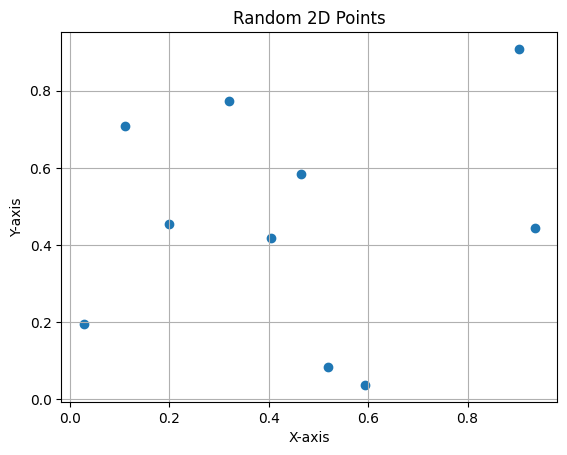

Generated 2D points:
[[0.46475127 0.58401605]
 [0.11029634 0.70731452]
 [0.40478794 0.41752922]
 [0.19965342 0.45409983]
 [0.93515136 0.44394343]
 [0.32051878 0.774205  ]
 [0.90418124 0.90847913]
 [0.02759711 0.19562249]
 [0.59409916 0.03650572]
 [0.51821791 0.08196229]]


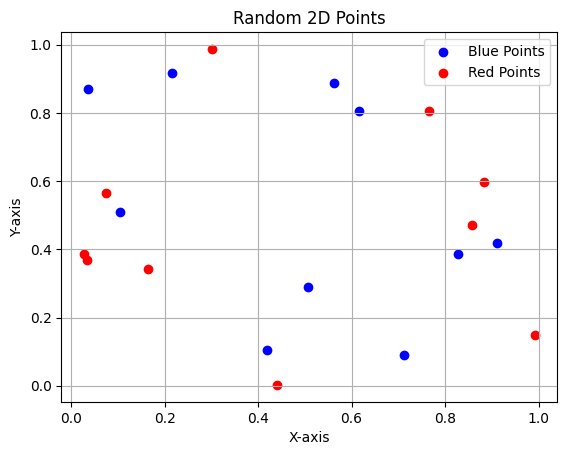

Generated 2D points:
Blue Points:
[[0.82827454 0.38613586]
 [0.50587785 0.28857906]
 [0.10364298 0.5102014 ]
 [0.41966747 0.10392743]
 [0.61656512 0.80559916]
 [0.71303132 0.0910185 ]
 [0.03569269 0.87071137]
 [0.90999611 0.41742996]
 [0.56292122 0.88763985]
 [0.21645067 0.91680773]]

Red Points:
[[0.03495399 0.3696864 ]
 [0.16473371 0.34263002]
 [0.44107022 0.00246567]
 [0.3013898  0.98784253]
 [0.8569788  0.47219052]
 [0.0273025  0.38651531]
 [0.88344666 0.59812291]
 [0.99176363 0.15013918]
 [0.76574249 0.80469642]
 [0.07450523 0.56647047]]


In [215]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
num_points = 10

# Generate random 2D points
points = np.random.rand(num_points, 2)  # Generates num_points points in 2D space

# Plot the points
plt.scatter(points[:, 0], points[:, 1])
plt.title('Random 2D Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# Print the points
print("Generated 2D points:")
print(points)

import numpy as np
import matplotlib.pyplot as plt

# Number of points
num_points = 10

# Generate random 2D points
points = np.random.rand(num_points, 2)  # Generates num_points points in 2D space

# Plot the blue points
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Blue Points')

# Generate additional random 2D points (red points)
additional_points = np.random.rand(num_points, 2)

# Plot the red points
plt.scatter(additional_points[:, 0], additional_points[:, 1], color='red', label='Red Points')

plt.title('Random 2D Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

# Print the points
print("Generated 2D points:")
print("Blue Points:")
print(points)
print("\nRed Points:")
print(additional_points)



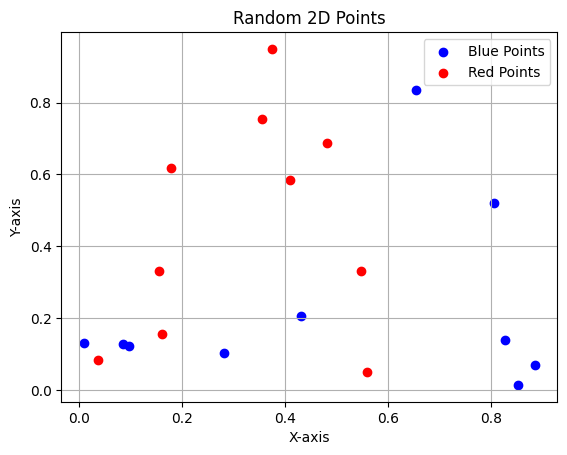

Generated 2D points with colors:
[['0.8523531059127428' '0.01419218096947994' 'blue']
 ['0.009168517120776376' '0.12995354605893894' 'blue']
 ['0.2814287242621475' '0.10389156390192678' 'blue']
 ['0.8264370364414235' '0.1384767864904234' 'blue']
 ['0.43084157695999703' '0.20603712240026395' 'blue']
 ['0.6549368797112283' '0.8347855761479192' 'blue']
 ['0.8851276932051155' '0.07002643646684958' 'blue']
 ['0.8059530484329812' '0.5198784355133139' 'blue']
 ['0.08612963122921402' '0.12761144641821587' 'blue']
 ['0.09647700243882251' '0.12349880383302914' 'blue']
 ['0.40888421687861' '0.5847065150388638' 'red']
 ['0.37505318544210975' '0.9495538816807471' 'red']
 ['0.4817125362918653' '0.6871370485556662' 'red']
 ['0.1556787407065474' '0.33056333136436933' 'red']
 ['0.548295802733759' '0.33101728263565533' 'red']
 ['0.16072599043655023' '0.15461567852640123' 'red']
 ['0.03735696505320851' '0.08252148958130512' 'red']
 ['0.5598793087299883' '0.05112170567025964' 'red']
 ['0.3553219701600563'

In [216]:
import numpy as np
import matplotlib.pyplot as plt

# Number of points
num_points = 10

# Generate random 2D points
points = np.random.rand(num_points, 2)  # Generates num_points points in 2D space

# Generate additional random 2D points (red points)
additional_points = np.random.rand(num_points, 2)

# Combine all points with their respective colors
# For blue points, 'blue' is used as the color, and for red points, 'red' is used
points_with_color = np.vstack((np.hstack((points, np.full((num_points, 1), 'blue'))),
                               np.hstack((additional_points, np.full((num_points, 1), 'red')))))

# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='blue', label='Blue Points')
plt.scatter(additional_points[:, 0], additional_points[:, 1], color='red', label='Red Points')

plt.title('Random 2D Points')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

# Print the points with color
print("Generated 2D points with colors:")
print(points_with_color)


In [217]:
# show(points_with_color)



In [218]:
matrix = []
for line in points_with_color:
    new_line = []
    for thing in line:
        if thing == line[0] or thing == line[1]:
            new_line.append((float(thing)))
        else:
            new_line.append(thing)
    matrix.append(new_line)

knn = KNN_classifier(k=5)
knn.feed_data(matrix)
knn.predict([0.8, 0.1])




k -> 5. 
sorted_distances -> [0.005953048432981167, 0.026437036441423478, 0.05235310591274278, 0.08512769320511548, 0.14506312028877177, 0.2401206912700118, 0.25170419726624105, 0.31828746370813477, 0.369158423040003, 0.39111578312139006, 0.4249468145578903, 0.44467802983994376, 0.5185712757378526, 0.6221417714940625, 0.6392740095634498, 0.6443212592934526, 0.7035229975611775, 0.713870368770786, 0.7626430349467915, 0.7908314828792237]
distance_data -> {0.05235310591274278: [{...}], 0.7908314828792237: [{...}], 0.5185712757378526: [{...}], 0.026437036441423478: [{...}], 0.369158423040003: [{...}], 0.14506312028877177: [{...}], 0.08512769320511548: [{...}], 0.005953048432981167: [{...}], 0.713870368770786: [{...}], 0.7035229975611775: [{...}], 0.39111578312139006: [{...}], 0.4249468145578903: [{...}], 0.31828746370813477: [{...}], 0.6443212592934526: [{...}], 0.25170419726624105: [{...}], 0.6392740095634498: [{...}], 0.7626430349467915: [{...}], 0.2401206912700118: [{...}], 0.44467802983

TypeError: 'NoneType' object is not iterable